In [37]:
import pandas as pd
import matplotlib.pyplot as plt
file='census-income.csv'
X_full=pd.read_csv(file)
X_full.shape


(48842, 15)

In [7]:
num_true=len(X_full.loc[X_full['income_level']==1])
num_false=len(X_full.loc[X_full['income_level']==0])

In [8]:
print("num_true:",num_true)
print("num_false:",num_false)


num_true: 11687
num_false: 37155


Since the data is unbalanced the algorithms to be used won't perform well the can appear to be an overfitting that's why I'm going to split the data and build a new dataset

In [10]:
data = X_full.sample(frac=1)
true_data = data.loc[data['income_level'] == 1]
false_data = data.loc[data['income_level'] == 0][:11687]

X = pd.concat([true_data, false_data])

In [11]:
X_full= X.sample(frac=1, random_state=42)
X_full.shape


(23374, 15)

In [12]:
X_full.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
20761,40.0,4.0,213821.0,12.0,14.0,4.0,10.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,1.0
1501,49.0,4.0,50282.0,15.0,10.0,0.0,7.0,1.0,4.0,1.0,3325.0,0.0,45.0,39.0,0.0
7641,31.0,5.0,455995.0,15.0,10.0,4.0,4.0,1.0,4.0,1.0,0.0,0.0,65.0,39.0,1.0
39084,48.0,4.0,205100.0,9.0,13.0,2.0,12.0,0.0,4.0,1.0,99999.0,0.0,80.0,39.0,1.0
28910,59.0,2.0,296253.0,12.0,14.0,0.0,10.0,4.0,4.0,0.0,8614.0,0.0,60.0,39.0,1.0


In [13]:
cols_with_missing=[col for col in X_full.columns if X_full[col].isnull().any()]

In [14]:
print(cols_with_missing)

[]


In [15]:
s=(X_full.dtypes=='object')
cat_cols=list(s[s].index)
print(cat_cols)

[]


                     age  workclass  ...  native_country  income_level
age             1.000000   0.015621  ...       -0.007027      0.284779
workclass       0.015621   1.000000  ...       -0.011414      0.058957
fnlwgt         -0.070269  -0.018849  ...       -0.039904     -0.007930
education       0.002140   0.015182  ...        0.056663      0.099105
education_num   0.068218   0.060227  ...        0.026577      0.382329
marital_status -0.243579  -0.066614  ...       -0.010605     -0.257791
occupation     -0.007383   0.221957  ...       -0.014846      0.095142
relationship   -0.252057  -0.081958  ...       -0.007178     -0.290278
race            0.046870   0.046509  ...        0.164175      0.085556
sex             0.127817   0.083100  ...       -0.002417      0.265395
capital_gain    0.087131   0.046131  ...       -0.005237      0.183292
capital_loss    0.062140   0.027807  ...        0.005377      0.150200
hours_per_week  0.055609   0.136525  ...        0.000828      0.270771
native

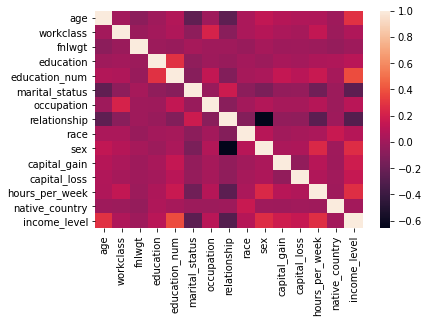

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt 
corrMatrix = X_full.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [18]:
y=X_full['income_level']
del(X_full['income_level'])

In [20]:
X_full.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20761,40.0,4.0,213821.0,12.0,14.0,4.0,10.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0
1501,49.0,4.0,50282.0,15.0,10.0,0.0,7.0,1.0,4.0,1.0,3325.0,0.0,45.0,39.0
7641,31.0,5.0,455995.0,15.0,10.0,4.0,4.0,1.0,4.0,1.0,0.0,0.0,65.0,39.0
39084,48.0,4.0,205100.0,9.0,13.0,2.0,12.0,0.0,4.0,1.0,99999.0,0.0,80.0,39.0
28910,59.0,2.0,296253.0,12.0,14.0,0.0,10.0,4.0,4.0,0.0,8614.0,0.0,60.0,39.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [22]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(X_train,y_train)
preds=gnb.predict(X_valid)
acc = metrics.accuracy_score(y_valid, preds) 
print(acc)

0.6327272727272727


In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.7,random_state=40)
model.fit(X_train,y_train)
predi=model.predict(X_valid)
acc = metrics.accuracy_score(y_valid, preds) 
print(acc)

0.6327272727272727


In [24]:
from xgboost import XGBClassifier

In [34]:
my_model = XGBClassifier(n_estimators=500)
my_model.fit(X_train, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
predds=my_model.predict(X_valid)
print(predds)

[0. 0. 1. ... 1. 1. 0.]


In [32]:
print(metrics.accuracy_score(y_valid, predds) )

0.8462032085561497
